Hola **Lucero**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Envio link presentacion
</div>

Envio link de la presentacion

https://docs.google.com/presentation/d/1fGTQjti-j5fTW6AOxQRn4VyFMyWNODfj/edit?usp=sharing&ouid=107463357521814982207&rtpof=true&sd=true

<div class="alert alert-block alert-success">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Lucero!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>

# Analisis de operadores

## En el siguiente trabajo se contienen datos de llamadas y operadores de un callcenter.
### El objetivo del trabajo es definir parametros para determinar si un operador es de baja eficiciencia, asi como determinar que operadores tienen baja eficicencia

### Cargar datos

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

da=pd.read_csv('/datasets/telecom_dataset_us.csv')
da2=pd.read_csv('/datasets/telecom_clients_us.csv')
da.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1


In [3]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
da2.head(1)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15


In [5]:
da2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


### Preprocesamiento

Los dataset de llamadas y clientes se van a unir en un solo dataset para poder analizar las llamadas, los planes y los clientes

In [6]:
data=pd.merge(da, da2, on='user_id')
#data.info()

### EDA (Analisis Exploratorio de los datos)

In [7]:
data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


El tiempo promedio de la duracion de las llamadas es de 866, la mitad de las llamadas dura 38

In [8]:
data.describe(include='object')

,date,direction,internal,tariff_plan,date_start
count,53902,53902,53785,53902,53902
unique,119,2,2,3,66
top,2019-11-25 00:00:00+03:00,out,False,C,2019-09-24
freq,1220,31917,47621,20061,2802


Hay 3 tipos de planes de tarifa

In [9]:
data.duplicated().sum()

4900

hay filas duplicadas las cuales se van a eliminar, porque esos datos duplicados pueden cambiar la cantidad de llamadas hace un operador

In [10]:
data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
tariff_plan               0
date_start                0
dtype: int64

La columna de 'operator_id' contiene valores ausentes, los cuales se van a eliminar, porque no permite identifcar si esas llamadas fueron realizadas por uno o mas operadores

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El análisis se realizó únicamente en base a este dataset, pero también se tiene el dataset de `telecom_clients_us.csv` con el que se debe trabajar ya que este contiene información de los clientes con los cuales los operadores se comunicaron.
</div>

### Procesamiento de datos

In [11]:
data.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01


In [12]:
data=data.dropna(subset=['operator_id'])
#da.info()

In [13]:
data['tespera']=data['total_call_duration']-data['call_duration']

In [14]:
data.duplicated().sum()

4184

In [15]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [16]:
data['date']=pd.to_datetime(data['date'])
data['mes']=data['date'].dt.month
data['fecha']=data['date'].dt.date
data['semana']=data['date'].dt.week

### Determinar eficiencia

#### Las llamadas se van a dividir en llamadas que entran o llamadas que salen, al grupo de llamadas que entran se le va a analizar la cantidad de llamadas perdidas y el tiempo de espera. Al grupo de llamadas que salen se le va a analizar la cantidad de llamadas realizadas por dia, semana y mes 

#### Llamadas que entran

Se van a filtrar los datos para solo obtener los datos de las llamadas que entran al callcenter

In [17]:
llentran=data.query("direction=='in'")
llentran.head(1)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,tespera,mes,fecha,semana
26,166377,2019-08-12 00:00:00+03:00,in,False,880028.0,False,1,407,411,B,2019-08-01,4,8,2019-08-12,33


In [18]:
#llentran.shape

In [19]:
planllE=llentran.groupby('tariff_plan')['calls_count'].count()
planllE

tariff_plan
A    3467
B    4180
C    5086
Name: calls_count, dtype: int64

Los clientes del plan A hacen menos llamadas al callcenter

In [20]:
llaEntranOP=llentran.groupby('operator_id')['calls_count'].count()
#llaEntranOP.shape

In [21]:
llPerdEntran=llentran.groupby('operator_id')['is_missed_call'].sum()

In [22]:
llau=pd.merge(llaEntranOP, llPerdEntran, on='operator_id')
llau['porc_perdidas']=(llau['is_missed_call'])/(llau['calls_count'])

In [23]:
tesperaEnt=llentran.groupby('operator_id')['tespera'].sum()

In [24]:
llauni=pd.merge(llau, tesperaEnt, on='operator_id')
llauni['porc_tiempo']=(llauni['tespera'])/(llauni['calls_count'])
llauni.head(1)

,calls_count,is_missed_call,porc_perdidas,tespera,porc_tiempo
operator_id,,,,,
879896.0,21,0,0.0,574,27.333333


In [25]:
llauni.describe()

,calls_count,is_missed_call,porc_perdidas,tespera,porc_tiempo
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,16.887268,0.908488,0.037090,1635.656499,57.612807
std,19.782396,2.405363,0.084203,4637.607919,94.456737
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.250000,0.000000,0.000000,62.000000,17.500000
50%,9.000000,0.000000,0.000000,255.000000,31.000000
75%,24.750000,1.000000,0.038105,1064.250000,58.000000
max,108.000000,28.000000,1.000000,52875.000000,1007.375000


En la siguiente grafica se muestra la distribucion del 'tiempo espera' (porc_tiempo), sin mostrar los valores atipicos

<AxesSubplot:xlabel='porc_tiempo'>

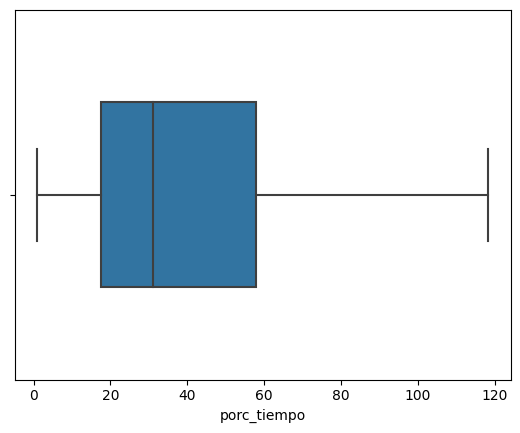

In [26]:
sns.boxplot(llauni['porc_tiempo'], width=.5, showfliers=False)

El tiempo de espera de cada operador se dividio entre el numero de llamadas de dicho operador para obtener el tiempo de espera por llamada, se encontro que el 75% de operadores tienen 60 en este parametro, por lo que se decidio que los operadores con mas de 60 en tiempo de espera por llamada es considerado de baja eficiencia

In [27]:
llinterna=llentran.groupby(['operator_id', 'internal'])['calls_count'].sum()
llinterna.shape
#llinterna.query()

(887,)

La cantidad de llamadas internas son muy pocas por lo que no se van a considerar para el analisis

In [28]:
OPaltaEnt=llauni.query("porc_tiempo<60")

In [29]:
OPbajaEnt=llauni.query("porc_tiempo>=60")
OPbajaEnt=OPbajaEnt.reset_index()
OPTiempoEspera=set(OPbajaEnt['operator_id'])
len(OPTiempoEspera)

179

En la siguiente grafica se muestra la distribucion de porcentaje de llamadas perdidas (sin mostrar los valores atipicos)

<AxesSubplot:xlabel='porc_perdidas'>

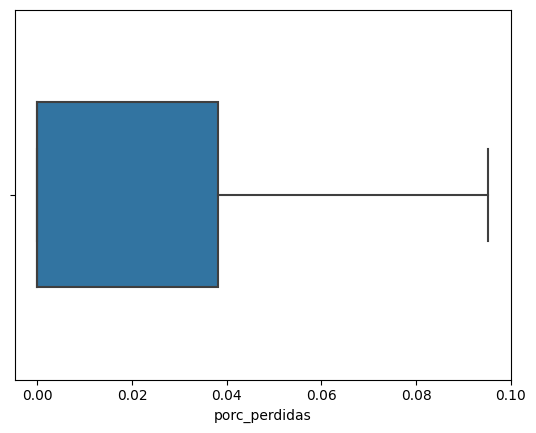

In [30]:
sns.boxplot(llauni['porc_perdidas'], width=.5, showfliers=False)

El 75% de operadores tienen menos de 3.8% de llamadas perdidas, por lo que los operadores con mas o igual a 3.8% de llamadas perdidas se va a considerar de baja eficiencia

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo incluyendo el EDA, ahora es mucho más claro las métricas con las que se trabajará y el por qué se aplicarán esos filtros para determinar la eficiencia
</div>

In [31]:
OPaltaEfiEnt=llauni.query("porc_perdidas<.038")
OPaltaEfiEnt.head(2)

,calls_count,is_missed_call,porc_perdidas,tespera,porc_tiempo
operator_id,,,,,
879896.0,21,0,0.0,574,27.333333
879898.0,57,0,0.0,1680,29.473684


In [32]:
OPbajaEfiEnt=llauni.query("porc_perdidas>=.038")
OPbajaEfiEnt=OPbajaEfiEnt.reset_index()
OPperdieronll=set(OPbajaEfiEnt['operator_id'])
len(OPperdieronll)  #operadores con muchas llamadas perdidas

189

In [33]:
OPbajaEnt.shape #operadores con mucho tiempo espera

(179, 6)

#### Pruebas estadisticas de las metricas en las llamadas entrantes

Se va a realizar una prueba estadistica para determinar si la metrica de "porc_tiempo" tiene una diferencia significativa entre los dos grupos (alta y baja eficiencia)
H0: La metrica de "porc_tiempo" entre los dos grupos (con eficiencia alta y baja) son iguales
H1: La metrica de "porc_tiempo" entre los dos grupos (con eficiencia alta y baja) son diferentes

Para determinar si los dos grupos tienen varianza igual se realizo una prueba de levene:

In [34]:
stat, p = st.levene(OPaltaEnt['porc_tiempo'], OPbajaEnt['porc_tiempo'])
p

5.877005161547221e-29

In [35]:
alpha=.05
results = st.ttest_ind(OPaltaEnt['porc_tiempo'], OPbajaEnt['porc_tiempo']) 
print('valor p:', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.1738247099759782e-72
Rechazamos la hipótesis nula


Al hacer la prueba estadistica, se obtuvo un p_value menor a 0.05, por lo que se rechaza la hipotesis nula, es decir la metrica entre los dos grupos si son diferentes

Se va a realizar una prueba estadistica para determinar si la metrica de "porc_perdidas" tiene una diferencia significativa entre los dos grupos (alta y baja eficiencia)
H0: La metrica de "porcentaje de llamadas perdidas" entre los dos grupos (con eficiencia alta y baja) son iguales
H1: La metrica de "porcentaje de llamadas perdidas" entre los dos grupos (con eficiencia alta y baja) son diferentes

In [36]:
stat, p = st.levene(OPbajaEfiEnt['porc_perdidas'], OPaltaEfiEnt['porc_perdidas'])
p

3.2779326538089564e-56

In [37]:
alpha=.05
results = st.ttest_ind(OPbajaEfiEnt['porc_perdidas'], OPaltaEfiEnt['porc_perdidas'], equal_var=False) 
print('valor p:', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.0318719318460162e-37
Rechazamos la hipótesis nula


Al hacer la prueba estadistica, se obtuvo un p_value menor a 0.05, por lo que se rechaza la hipotesis nula, es decir la metrica entre los dos grupos si son diferentes

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

¿Que és lo que se intenta comprobar con este test estadístico, cual es la H1 y H0? Además, antes de pasar a aplicar pruebas estadísticas o cual operación se debería realizar un EDA más detallado de las variables disponibles haciendo uso de gráficas y redactando la interpretación de las mismas
</div>

In [38]:
OPbajaEficienciaEntr=OPperdieronll&OPTiempoEspera
OPbajaEficienciaEntr
len(OPbajaEficienciaEntr)

79

Se encontro que son 79 operadores (aproximadamente el 10%) los que tienen baja eficiencia en recibir llamadas, dado que presentan alta cantidad de llamadas perdidas y altos tiempos de espera

#### Llamadas que salen

In [52]:
llsalen=data.query("direction=='out'")
#llsalen.shape

In [40]:
llsalen.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,tespera,mes,fecha,semana
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01,5,8,2019-08-05,32
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01,1,8,2019-08-05,32


In [41]:
planLLamada=llsalen.groupby('tariff_plan')['calls_count'].count()
planLLamada

tariff_plan
A     8759
B    10303
C     9751
Name: calls_count, dtype: int64

In [42]:
planPerdida=llsalen.groupby('tariff_plan')['is_missed_call'].sum()
planPerdida

tariff_plan
A    4056
B    4738
C    4631
Name: is_missed_call, dtype: int64

In [43]:
planPerdida/planLLamada

tariff_plan
A    0.463067
B    0.459866
C    0.474926
dtype: float64

Hay la misma proporcion de llamadas perdidas/llamadas totales por tipo de plan, es decir el tipo de plan no afecta a la cantidad de llamdas que los clientes no contestan

In [44]:
llaSalenOP=llsalen.groupby('operator_id')['calls_count'].count()
llaSalenOP.describe()

count    882.000000
mean      32.667800
std       38.145841
min        1.000000
25%        5.000000
50%       19.000000
75%       45.000000
max      228.000000
Name: calls_count, dtype: float64

In [45]:
llsalenDia=llsalen.groupby(['operator_id', 'fecha'])['calls_count'].count()
llsalenDia=llsalenDia.reset_index()
llsalenDia.tail(1)

,operator_id,fecha,calls_count
15112,973120.0,2019-11-27,2


In [46]:
llpro=llsalenDia.groupby('operator_id')['calls_count'].mean()
llpro.head(3)

operator_id
879896.0    1.959184
879898.0    2.073171
880020.0    1.857143
Name: calls_count, dtype: float64

In [47]:
llpro.describe()

count    882.000000
mean       1.735807
std        0.512887
min        1.000000
25%        1.333333
50%        1.787594
75%        2.000000
max        4.000000
Name: calls_count, dtype: float64

In [48]:
llsalenSem=llsalen.groupby(['operator_id', 'semana'])['calls_count'].count()
llsalenSem=llsalenSem.reset_index()
llsalenSem.tail(3)

,operator_id,semana,calls_count
4413,972412.0,48,4
4414,972460.0,48,6
4415,973120.0,48,2


In [49]:
llproSem=llsalenSem.groupby('operator_id')['calls_count'].mean()
llproSem=llproSem.reset_index()
llproSem.head(1)

,operator_id,calls_count
0,879896.0,6.4


In [50]:
llproSem.describe()

,operator_id,calls_count
count,882.000000,882.000000
mean,925658.340136,5.195221
std,22862.558731,3.440017
min,879896.000000,1.000000
25%,906394.500000,2.000000
50%,924959.000000,4.619048
75%,943630.000000,7.528846
max,973120.000000,17.538462


In [51]:
sns.boxplot(llproSem, width=.5)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

El 25% de los operadores realiza 2 o menos llamadas por semana, lo cual se va a considerar como baja eficiencia

In [ ]:
llsalenMes=llsalen.groupby(['operator_id', 'mes'])['calls_count'].count()
llsalenMes=llsalenMes.reset_index()
llsalenMes.head(2)

In [ ]:
llsalenMesProm=llsalenMes.groupby('operator_id')['calls_count'].sum()
llsalenMesProm=llsalenMesProm.reset_index()
llsalenMesProm['promedio']=(llsalenMesProm['calls_count'])/4
llsalenMesProm.head(1)

In [ ]:
llsalenMesProm['promedio'].quantile(.25)

In [ ]:
llsalenMesProm.describe()

In [ ]:
sns.boxplot(x=llsalenMesProm['promedio'],  width=.5)

En las llamadas realizadas por mes hay muchos valores atipicos, por lo que para el analisis de operadores con baja eficiencia se va a usar los datos de llamadas por semana

In [ ]:
OPbajaSalida=llproSem.query("calls_count<=2")
OPbajaSalida.head(1)

In [ ]:
OPbajaEfiSalida=set(OPbajaSalida['operator_id'])
len(OPbajaEfiSalida)

In [ ]:
OPaltaSalida=llproSem.query("calls_count>2")

#### Prueba estadistica llamadas que salen

Se va a realizar una prueba estadistica para determinar si la metrica de "llamadas promedio por semana" tiene una diferencia significativa entre los dos grupos (alta y baja eficiencia).
H0: La metrica de "llamadas promedio por semana" entre los dos grupos (con eficiencia alta y baja) son iguales
H1: La metrica de "llamadas promedio por semana" entre los dos grupos (con eficiencia alta y baja) son diferentes

In [ ]:
stat, p = st.levene(OPaltaSalida['calls_count'], OPbajaSalida['calls_count'])
p

H0: Los dos grupos (con eficiencia alta y baja) son iguales
H1: Los dos grupos (con eficiencia alta y baja) son diferentes

In [ ]:
alpha=.05
results = st.ttest_ind(OPaltaSalida['calls_count'], OPbajaSalida['calls_count']) 
print('valor p:', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Al hacer la prueba estadistica, se obtuvo un p_value menor a 0.05, por lo que se rechaza la hipotesis nula, es decir la metrica entre los dos grupos si son diferentes

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es claro cómo llegaste a las hipótesis para aplicar las pruebas estadísticas, debes dejar claro cual es tu H1 y H0.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, ahora es fácil de entender el por que se está aplicando las pruebas estadísticas lo cual es un paso importante en este tipo de análisis
</div>

In [ ]:
operadoresBajaEf=OPbajaEfiSalida&OPperdieronll&OPTiempoEspera
operadoresBajaEf

Los operadores que presentaron baja eficiencia en llamadas perdidas, tiempo de espera y cantidad de llamadas realizadas son pocos (4 operadores) 

CONCLUSION

-Los operadores con baja eficiencia en llamadas entrantes por tiempo de espera prolongado fueron aprox 180 

-Los operadores con baja eficiencia en llamadas entrantes por llamadas perdidas fueron aprox 180 

-Los operadores con baja eficiencia por baja cantidad de llamadas realizadas (salientes) fueron aprox 230

-Los operadores que presentaron baja eficiencia en los 3 parametros fueron pocos (4) 

-Los datos de llamadas salientes se analizaron por dia, semana y mes, se encontro que los datos por semana contenian menos valores atipicos, por lo que se usaron estos datos para determinar la baja eficiencia.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En tu proyecto final el objetivo es identificar los operadores eficientes e ineficientes y además el notebook debe ser claro y ordenado para que el proceso de análisis se pueda entender. Te invito a revisar los siguientes puntos para mejorar tu proyecto:

- Divide tu proyecto por secciones para que sea claro lo que se está haciendo, por ejemplo, Carga de datos, preprocesamiento, EDA, determinar eficiencia, pruebas estadísticas, etc pueden ser diferentes secciones en tu notebook.
- El EDA debe ser más detallado sobre los datos que se van a usar
- No es claro cómo se está determinando la eficiencia de los operadores, ¿Se utilizó algún filtro? ¿Cómo se llegó a determinar esos umbrales para determinar eficiencia?

El notebook debe quedar muy claro para cuando alguien que no tenga un background técnico pueda entenderlo gracias a tus comentarios en cada sección.

No olvides que también se debe realizar una presentación en PDF y subirla a drive con los resultados de tu proyecto, puedes usar Power Point o Google Slides cómo si fueras a exponer los resultados ante la empresa que solicitó el proyecto y eso exportarlo a pdf y subirlo a drive configurando correctamente la privacidad para que cualquiera con el link pueda verlo.

Si tienes dudas o dificultades no olvides que puedes contactar a tu tutor para que te ayude con las mismas, saludos!
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
La presentacion la estoy haciendo
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Por favor continúa con la parte de la presentación para completar tu proyecto!
</div>